<a href="https://colab.research.google.com/github/konkuk-gaegul/Fire-Safety-Prediction-AI-Contest/blob/main/AJH_Public_Data_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활용 가능한 데이터 탐색
- 소상공인 데이터
- 어린이/노인/장애인 보호구역

In [2]:
# 경고 무시 명령
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pyproj
!pip install geopandas
!pip install furl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
from IPython.display import Image

## 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandas.plotting import scatter_matrix

## 지도 시각화를 위한 라이브러리
from folium import plugins
from folium.features import DivIcon
import folium
import pyproj
from pyproj import Proj, transform
from shapely.geometry import Polygon
import geopandas as gpd

## 새로운 feature를 추가하기 위한 라이브러리
# 날짜
import time
import datetime
import holidays
# 날씨
import requests, bs4
from furl import furl
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [5]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [6]:
# DataFrame의 결측치 체크 함수

def check_null(old_df):
    columns = old_df.columns
    for col in columns:
        bool_series =old_df[ old_df[col].isnull()]
        True_count = len( bool_series )
        print( col , '열의 결측치는' , True_count , '개 입니다')

## 전국 소상공인 데이터
- 2022년 06월
- 강원도 원주시 추출

In [17]:
df = pd.read_csv('/content/drive/MyDrive/GS리테일/data/소상공인시장진흥공단_상가정보/소상공인시장진흥공단_상가(상권)정보_강원_202206.csv')
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150,26385.0,NaN,NaN,NaN,127.917307,37.327668


In [18]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [19]:
df_wonju = df[df.도로명주소.apply(lambda x : x.split(' ')[1] == '원주시')]
df_wonju.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150,26385.0,NaN,NaN,NaN,127.917307,37.327668
6,17174157,치킨플러스원주기업도시점,원주기업도시점,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,4213033023114930000000001,원주기업도시라온프라이빗,강원도 원주시 지정면 가곡로 132,220821,26352.0,NaN,NaN,NaN,127.873974,37.383057
20,28515796,편백나무숲펜션,NaN,O,숙박,O03,캠프/별장/펜션,O03A01,캠프/별장/펜션,I55119,...,4213033022200530001000001,NaN,강원도 원주시 지정면 원양2로 25-14,220824,26359.0,NaN,1,NaN,127.797533,37.350421


In [30]:
df_wonju['new_hang'] = df_wonju.행정동명.replace('명륜1동' , '명륜동').replace('명륜2동', '명륜동')
df_wonju['new_hang'] = df_wonju.new_hang.replace('태장1동' , '태장동').replace('태장2동', '태장동')
df_wonju['new_hang'] = df_wonju.new_hang.replace('반곡관설동' , '반곡동')
df_wonju['new_hang'].unique()

array(['무실동', '지정면', '행구동', '문막읍', '호저면', '단구동', '흥업면', '개운동', '반곡동',
       '명륜동', '태장동', '중앙동', '단계동', '우산동', '일산동', '원인동', '판부면', '봉산동',
       '신림면', '학성동', '귀래면', '부론면', '소초면'], dtype=object)

In [31]:
df_wonju.to_csv('/content/drive/MyDrive/소방안전 AI  경진대회/데이터/전처리 데이터/전국소상공인데이터_원주_추출_ver2.csv' , index = False)

In [32]:
df_wonju = pd.read_csv('/content/drive/MyDrive/소방안전 AI  경진대회/데이터/전처리 데이터/전국소상공인데이터_원주_추출_ver2.csv')
df_wonju.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,new_hang
0,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,NaN,강원도 원주시 송삼길 156-19,220150,26385.0,NaN,NaN,NaN,127.917307,37.327668,무실동
1,17174157,치킨플러스원주기업도시점,원주기업도시점,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,원주기업도시라온프라이빗,강원도 원주시 지정면 가곡로 132,220821,26352.0,NaN,NaN,NaN,127.873974,37.383057,지정면
2,28515796,편백나무숲펜션,NaN,O,숙박,O03,캠프/별장/펜션,O03A01,캠프/별장/펜션,I55119,...,NaN,강원도 원주시 지정면 원양2로 25-14,220824,26359.0,NaN,1,NaN,127.797533,37.350421,지정면
3,21635632,건영공인중개사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,건영아파트,강원도 원주시 행구로 287,220797,26454.0,NaN,1,NaN,127.987018,37.343114,행구동
4,21654160,피아노치는대통령,NaN,R,학문/교육,R05,학원-음악미술무용,R05A02,피아노/바이올린/기타,P85620,...,동화빌딩,강원도 원주시 문막읍 왕건로 81,220801,26367.0,NaN,2,NaN,127.829101,37.326699,문막읍


In [ ]:
df_wonju.상권업종대분류명.value_counts().head(30)

음식          7420
소매          6980
생활서비스       3953
학문/교육       1402
부동산          714
관광/여가/오락     459
숙박           362
스포츠          194
Name: 상권업종대분류명, dtype: int64

### 스포츠

In [37]:
df_wonju[df_wonju.상권업종대분류명 == '스포츠'].상권업종중분류명.value_counts()

실내운동시설    169
운영관리시설     13
실외운동시설     12
Name: 상권업종중분류명, dtype: int64

In [38]:
df_wonju[df_wonju.상권업종대분류명 == '스포츠'].상권업종소분류명.value_counts()

헬스클럽            60
실내골프연습장         47
체육관             24
기타실내운동시설        13
스포츠센터           11
기타운영설비           9
골프장              6
복싱도장             5
이종격투기            5
기타경기후원업/경기단체     3
실내테니스장           3
테니스장             1
눈썰매장             1
실외골프연습장          1
인공암벽             1
운동경기협회           1
승마장              1
스킨스쿠버강습          1
실내수영장            1
Name: 상권업종소분류명, dtype: int64

### 숙박

In [39]:
df_wonju[df_wonju.상권업종대분류명 == '숙박'].상권업종중분류명.value_counts()

모텔/여관/여인숙    187
민박/하숙         73
캠프/별장/펜션      71
호텔/콘도         27
유스호스텔          4
Name: 상권업종중분류명, dtype: int64

In [40]:
df_wonju[df_wonju.상권업종대분류명 == '숙박'].상권업종소분류명.value_counts()

모텔/여관/여인숙    187
민박/하숙         73
캠프/별장/펜션      71
호텔/콘도         27
유스호스텔          4
Name: 상권업종소분류명, dtype: int64

###  음식 + 소매

In [73]:
df_wonju[(df_wonju.상권업종대분류명 == '소매') | (df_wonju.상권업종대분류명 == '음식')].상권업종중분류명.value_counts()

한식               3126
종합소매점            1244
음/식료품소매           915
커피점/카페            913
가정/주방/인테리어        826
의복의류              803
유흥주점              633
분식                580
닭/오리요리            509
일식/수산물            398
철물/난방/건설자재소매      310
패스트푸드             302
자동차/자동차용품         280
사진/광학/정밀기기소매      275
화장품소매             263
제과제빵떡케익           243
양식                240
건강/미용식품           232
중식                225
사무/문구/컴퓨터         222
선물/팬시/기념품         195
가구소매              193
기타판매업             192
가방/신발/액세서리        189
운동/경기용품소매         179
별식/퓨전요리           158
의약/의료품소매          140
중고품소매/교환          104
가전제품소매             91
책/서적/도서            59
애견/애완/동물           58
시계/귀금속소매           57
취미/오락관련소매          52
페인트/유리제품소매         45
기타음식업              42
부페                 32
예술품/골동품/수석/분재      30
유아용품               21
음식배달서비스            19
종교용품판매              5
Name: 상권업종중분류명, dtype: int64

In [74]:
df_wonju[(df_wonju.상권업종대분류명 == '소매') | (df_wonju.상권업종대분류명 == '음식')].상권업종소분류명.value_counts()

한식/백반/한정식      2093
커피전문점/카페/다방     872
편의점             459
갈비/삼겹살          357
후라이드/양념치킨       328
               ... 
생식판매              1
토산품/기념품점          1
금고판매              1
천주교서적판매           1
닭도리탕전문            1
Name: 상권업종소분류명, Length: 301, dtype: int64

## 어린이보호구역

In [ ]:
kid_df = pd.read_csv('/content/drive/MyDrive/소방안전 AI  경진대회/원 데이터/전국어린이보호구역표준데이터.csv' , encoding = 'euc-kr')
kid_zone_wonju = kid_df[kid_df.제공기관명.str.contains('원주시')].reset_index()
kid_zone_wonju.drop(columns = ['index'] , inplace= True)
kid_zone_wonju.head(3)

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,유치원,한아름,강원도 원주시 송림길 78,강원도 원주시 단구동 1455-3,37.330458,127.955658,강원도 원주시청,원주경찰서,Y,1.0,10,2022-04-28,4190000,강원도 원주시
1,유치원,큰나무,강원도 원주시 북원로2704번길 29-1,강원도 원주시 태장동 1369-3,37.385125,127.950218,강원도 원주시청,원주경찰서,Y,1.0,10,2022-04-28,4190000,강원도 원주시
2,유치원,학림,강원도 원주시 판부면 서곡널다리길 18-1,강원도 원주시 판부면 서곡리 534-13,37.322068,127.936254,강원도 원주시청,원주경찰서,Y,1.0,10,2022-04-28,4190000,강원도 원주시


In [ ]:
# 도로명 주소에 NaN값 하나 포착
kid_zone_wonju[kid_zone_wonju.소재지도로명주소.isnull()]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
46,초등학교,샘마루초등학교,NaN,강원도 원주시 지정면 가곡리 1507-1,37.379499,127.871104,강원도 원주시청,원주경찰서,Y,2.0,30,2022-04-28,4190000,강원도 원주시


In [ ]:
# 지번 주소에는 NaN값 없음
kid_zone_wonju[kid_zone_wonju.소재지지번주소.isnull()]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명


In [ ]:
kid_zone_wonju.iloc[ 46 : 47 , :].소재지도로명주소 = kid_zone_wonju.iloc[ 46 : 47 , :].소재지지번주소
kid_zone_wonju.iloc[ 46 : 47 , :]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
46,초등학교,샘마루초등학교,강원도 원주시 지정면 가곡리 1507-1,강원도 원주시 지정면 가곡리 1507-1,37.379499,127.871104,강원도 원주시청,원주경찰서,Y,2.0,30,2022-04-28,4190000,강원도 원주시


In [ ]:
kid_zone_wonju.to_csv('/content/drive/MyDrive/소방안전 AI  경진대회/원 데이터/전국_어린이보호구역_원주시_추출.csv', index = False)

## 노인장애인보호구역

In [ ]:
old_df = pd.read_csv('/content/drive/MyDrive/소방안전 AI  경진대회/원 데이터/전국노인장애인보호구역표준데이터.csv' , encoding = 'euc-kr')
old_df_wonju = old_df[old_df.시군구명 == '원주시']
old_df_wonju.head(3)

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
1857,1.0,노인종합복지관,강원도,원주시,42130,강원도 원주시 동부순환로 9-6,강원도 원주시 단구동 1486-14,37.318658,127.969307,30,강원도 원주시,033-737-3512,원주경찰서,N,NaN,10~20,2022-03-03,4190000,강원도 원주시
1858,2.0,주.단기보호센터 꿈꾸는나무,강원도,원주시,42130,강원도 원주시 치악로1534번길 14-3,강원도 원주시 단구동 1473-4,37.321472,127.966528,30,강원도 원주시,033-737-3512,원주경찰서,Y,1.0,8,2022-03-03,4190000,강원도 원주시
1859,1.0,황둔송계경로당,강원도,원주시,42130,강원도 원주시 신림면 신림황둔로 1214,강원도 원주시 신림면 황둔리 333-3,37.261670,128.189420,30,강원도 원주시,033-737-3512,원주경찰서,N,NaN,10,2022-03-03,4190000,강원도 원주시


In [ ]:
def check_null(old_df):
    columns = old_df.columns
    for col in columns:
        bool_series =old_df[ old_df[col].isnull()]
        True_count = len( bool_series )
        print( col , '열의 결측치는' , True_count , '개 입니다')

In [ ]:
check_null(old_df_wonju)

장소유형코드 열의 결측치는 0 개 입니다
대상시설명 열의 결측치는 0 개 입니다
시도명 열의 결측치는 0 개 입니다
시군구명 열의 결측치는 0 개 입니다
시군구코드 열의 결측치는 0 개 입니다
소재지도로명주소 열의 결측치는 1 개 입니다
소재지지번주소 열의 결측치는 0 개 입니다
위도 열의 결측치는 0 개 입니다
경도 열의 결측치는 0 개 입니다
제한속도 열의 결측치는 0 개 입니다
관리기관명 열의 결측치는 0 개 입니다
관리기관전화번호 열의 결측치는 0 개 입니다
관할경찰서명 열의 결측치는 0 개 입니다
CCTV설치여부 열의 결측치는 0 개 입니다
CCTV설치대수 열의 결측치는 4 개 입니다
보호구역도로폭 열의 결측치는 0 개 입니다
데이터기준일자 열의 결측치는 0 개 입니다
제공기관코드 열의 결측치는 0 개 입니다
제공기관명 열의 결측치는 0 개 입니다


In [ ]:
# 위도 경도의 결측치는 삭제
# idx = old_df[['위도' , '경도']].dropna(axis = 0).index
# old_df_GPS_drop = old_df.loc[ idx , :]
# old_df_GPS_drop.head(2)

In [ ]:
# check_null(old_df_GPS_drop)

In [ ]:
# old_df_GPS_drop[ ['소재지도로명주소' , '소재지지번주소'] ].isnull()

In [ ]:
# 주소 둘 다 NaN값인 애들은 없다
old_df_wonju[ (old_df_wonju.소재지도로명주소.isnull() == True) ]

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
1861,1.0,원주보훈요양원,강원도,원주시,42130,NaN,강원도 원주시 반곡동 1956-1,37.330255,127.991283,30,강원도 원주시,033-737-3512,원주경찰서,Y,1.0,40,2022-03-03,4190000,강원도 원주시


In [ ]:
old_df_wonju.loc[ 1861 : 1861 , :].소재지도로명주소 = old_df_wonju.loc[ 1861 : 1861 , :].소재지지번주소
old_df_wonju.loc[ 1861 : 1861 , :]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
1861,1.0,원주보훈요양원,강원도,원주시,42130,강원도 원주시 반곡동 1956-1,강원도 원주시 반곡동 1956-1,37.330255,127.991283,30,강원도 원주시,033-737-3512,원주경찰서,Y,1.0,40,2022-03-03,4190000,강원도 원주시


In [ ]:
check_null(old_df_wonju)

장소유형코드 열의 결측치는 0 개 입니다
대상시설명 열의 결측치는 0 개 입니다
시도명 열의 결측치는 0 개 입니다
시군구명 열의 결측치는 0 개 입니다
시군구코드 열의 결측치는 0 개 입니다
소재지도로명주소 열의 결측치는 0 개 입니다
소재지지번주소 열의 결측치는 0 개 입니다
위도 열의 결측치는 0 개 입니다
경도 열의 결측치는 0 개 입니다
제한속도 열의 결측치는 0 개 입니다
관리기관명 열의 결측치는 0 개 입니다
관리기관전화번호 열의 결측치는 0 개 입니다
관할경찰서명 열의 결측치는 0 개 입니다
CCTV설치여부 열의 결측치는 0 개 입니다
CCTV설치대수 열의 결측치는 4 개 입니다
보호구역도로폭 열의 결측치는 0 개 입니다
데이터기준일자 열의 결측치는 0 개 입니다
제공기관코드 열의 결측치는 0 개 입니다
제공기관명 열의 결측치는 0 개 입니다


In [ ]:
old_df_wonju.to_csv('/content/drive/MyDrive/소방안전 AI  경진대회/원 데이터/전국노인장애인보호구역_원주_추출.csv' , index = False)

## raw_data 동리 추출

In [42]:
# 대회 데이터 탐색
raw_data = pd.read_csv('/content/drive/MyDrive/소방안전 AI  경진대회/dataset.csv' , encoding = 'euc-kr')
raw_data.head(2)

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,BCYC_ACDNT_OCRN_CNT,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT
0,378508,378475,508475,2021-01-01,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378509,378475,509475,2021-01-01,0.0,0.0,0.4,0.0,0.27,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
raw_data.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'OCRN_YMD', 'M00', 'M10',
       'M15', 'M20', 'M25', 'M30', 'M35', 'M40', 'M45', 'M50', 'M55', 'M60',
       'M65', 'M70', 'F00', 'F10', 'F15', 'F20', 'F25', 'F30', 'F35', 'F40',
       'F45', 'F50', 'F55', 'F60', 'F65', 'F70', 'DONG_CD', 'DONG_NM',
       'HGTPOJ_ACDNT_OCRN_CNT', 'PNTRINJ_OCRN_CNT', 'MCHN_ACDNT_OCRN_CNT',
       'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT', 'ACDNT_INJ_OCRN_CNT',
       'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT', 'HRFAF_OCRN_CNT',
       'AGRCMCHN_ACDNT_OCRN_CNT', 'DRKNSTAT_OCRN_CNT',
       'ANML_INSCT_ACDNT_OCRN_CNT', 'FLPS_ACDNT_OCRN_CNT', 'UNKNWN_OCRN_CNT',
       'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT', 'MTRCYC_ACDNT_OCRN_CNT',
       'THML_DAMG_OCRN_CNT', 'DRV_ACDNT_OCRN_CNT', 'DRWNG_OCRN_CNT',
       'PRGNTW_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT', 'ELTRC_ACDNT_OCRN_CNT',
       'POSNG_OCRN_CNT', 'ASPHYXIA_OCRN_CNT', 'FALLING_OCRN_CNT',
       'FLAME_OCRN_CNT', 'CHMC_SBSTNC_ACDNT_OCRN_CNT', 'WETHR_ACDNT_

In [44]:
raw_data.DONG_NM.unique()

array(['정산리', '법천리', '흥호리', '대둔리', '반계리', '노림리', '취병리', '안창리', '단강리',
       '손곡리', '판대리', '후용리', '월송리', '궁촌리', '포진리', '문막리', '건등리', '간현리',
       '용암리', '비두리', '동화리', '주포리', '귀래리', '운계리', '보통리', '가곡리', '대안리',
       '사제리', '매호리', '산현리', '운남리', '신평리', '무장리', '용곡리', '매지리', '만종리',
       '흥업리', '무실동', '가현동', '주산리', '옥산리', '고산리', '서곡리', '단계동', '우산동',
       '광격리', '학성동', '대덕리', '단구동', '명륜동', '원동', '태장동', '장양리', '신촌리',
       '관설동', '개운동', '봉산동', '의관리', '반곡동', '흥양리', '수암리', '둔둔리', '금대리',
       '행구동', '평장리', '교항리', '금창리', '학곡리', '구학리', '성남리', '신림리', '황둔리',
       '송계리'], dtype=object)

In [45]:
raw_dong = pd.DataFrame(raw_data.DONG_NM)
raw_dong.to_csv('/content/drive/MyDrive/소방안전 AI  경진대회/데이터/전처리 데이터/dataset_동리_추출.csv' , index = False)

In [46]:
raw_dong

,DONG_NM
0,정산리
1,정산리
2,법천리
3,법천리
4,법천리
...,...
302163,송계리
302164,송계리
302165,송계리
302166,송계리


In [47]:
raw_dong[raw_dong.DONG_NM.str.contains('정산리')]

,DONG_NM
0,정산리
1,정산리
11,정산리
12,정산리
13,정산리
...,...
301377,정산리
301404,정산리
301405,정산리
301406,정산리


In [48]:
raw_dong.DONG_NM.unique()

array(['정산리', '법천리', '흥호리', '대둔리', '반계리', '노림리', '취병리', '안창리', '단강리',
       '손곡리', '판대리', '후용리', '월송리', '궁촌리', '포진리', '문막리', '건등리', '간현리',
       '용암리', '비두리', '동화리', '주포리', '귀래리', '운계리', '보통리', '가곡리', '대안리',
       '사제리', '매호리', '산현리', '운남리', '신평리', '무장리', '용곡리', '매지리', '만종리',
       '흥업리', '무실동', '가현동', '주산리', '옥산리', '고산리', '서곡리', '단계동', '우산동',
       '광격리', '학성동', '대덕리', '단구동', '명륜동', '원동', '태장동', '장양리', '신촌리',
       '관설동', '개운동', '봉산동', '의관리', '반곡동', '흥양리', '수암리', '둔둔리', '금대리',
       '행구동', '평장리', '교항리', '금창리', '학곡리', '구학리', '성남리', '신림리', '황둔리',
       '송계리'], dtype=object)

In [49]:
# 문막읍 : 문막리, 포진리, 궁촌리, 비두리, 후용리, 반계리, 취병리, 건등리, 동화리, 대둔리
# 소초면 : 교항리, 둔둔리, 수암리, 의관리, 장양리, 평장리, 학곡리, 흥양리
# 호저면 : 고산리, 광격리, 대덕리, 만종리, 매호리, 무장리, 산현리, 옥산리, 용곡리, 주산리
# 지정면 : 간현리, 판대리, 안창리, 가곡리, 월송리, 신평리, 보통리
# 부론면 : 법천리, 흥호리, 노림리, 손곡리, 정산리, 단강리
# 귀래면 : 용암리, 주포리, 운남리, 운계리, 귀래리
# 흥업면 : 흥업리, 사제리, 대안리, 매지리
# 판부면 : 금대리, 서곡리, 신촌리
# 신림면 : 신림리, 금창리, 구학리, 성남리, 황둔리, 송계리
# 중앙동 : 중앙동, 평원동
# 원인동 : 원동, 인동
# 개운동 : 개운동
# 명륜동 : 명륜동
# 일산동 : 일산동
# 학성동 : 학성동
# 태장동 : 태장동, 가현동
# 봉산동 ; 봉산동
# 행구동 : 행구동
# 무실동 : 무실동, 단계동
# 반곡동 : 반곡동, 관설동
# 단구동 : 단구동
# 우산동 : 우산동

In [50]:
dong_series = raw_dong.DONG_NM
dong_series.head(5)

0    정산리
1    정산리
2    법천리
3    법천리
4    법천리
Name: DONG_NM, dtype: object

In [55]:
hang = [ '문막읍' ,
        '소초면',
        '호저면', 
        '지정면', 
        '부론면' ,
        '귀래면' ,
        '흥업면' ,
        '판부면' ,
        '신림면', 
        '중앙동' ,
        '원인동' , '개운동' ,'명륜동' , '일산동' ,
        '학성동' , '태장동' ,'봉산동' ,
        '행구동' , '무실동' ,'반곡동' , 
        '단구동' , '우산동']

beob = [ ['문막리', '포진리', '궁촌리', '비두리', '후용리', '반계리', '취병리', '건등리', '동화리', '대둔리'],
        ['교항리', '둔둔리', '수암리', '의관리', '장양리', '평장리', '학곡리', '흥양리'],
        ['고산리', '광격리', '대덕리', '만종리', '매호리', '무장리', '산현리', '옥산리', '용곡리', '주산리'],
        ['간현리', '판대리', '안창리', '가곡리', '월송리', '신평리', '보통리'],
        ['법천리', '흥호리', '노림리', '손곡리', '정산리', '단강리'],
        ['용암리', '주포리', '운남리', '운계리', '귀래리'],
        ['흥업리', '사제리', '대안리', '매지리'],
        ['금대리', '서곡리', '신촌리'],
        ['신림리', '금창리', '구학리',  '성남리', '황둔리', '송계리'],
        ['평원동'],
        ['원동', '인동'], ['개운동'], ['명륜동'] , ['일산동'],
        ['학성동'], ['태장동', '가현동'] , ['봉산동'],
        ['행구동'] , ['무실동', '단계동'] , ['반곡동' , '관설동'],
        ['단구동'] , ['우산동']
        ]

In [56]:
len(hang) , len(beob)

(22, 22)

In [57]:
hang_beob_dic = {}
for i in range(len(hang)):
    hang_beob_dic[hang[i]] = beob[i]
print(hang_beob_dic)

{'문막읍': ['문막리', '포진리', '궁촌리', '비두리', '후용리', '반계리', '취병리', '건등리', '동화리', '대둔리'], '소초면': ['교항리', '둔둔리', '수암리', '의관리', '장양리', '평장리', '학곡리', '흥양리'], '호저면': ['고산리', '광격리', '대덕리', '만종리', '매호리', '무장리', '산현리', '옥산리', '용곡리', '주산리'], '지정면': ['간현리', '판대리', '안창리', '가곡리', '월송리', '신평리', '보통리'], '부론면': ['법천리', '흥호리', '노림리', '손곡리', '정산리', '단강리'], '귀래면': ['용암리', '주포리', '운남리', '운계리', '귀래리'], '흥업면': ['흥업리', '사제리', '대안리', '매지리'], '판부면': ['금대리', '서곡리', '신촌리'], '신림면': ['신림리', '금창리', '구학리', '성남리', '황둔리', '송계리'], '중앙동': ['평원동'], '원인동': ['원동', '인동'], '개운동': ['개운동'], '명륜동': ['명륜동'], '일산동': ['일산동'], '학성동': ['학성동'], '태장동': ['태장동', '가현동'], '봉산동': ['봉산동'], '행구동': ['행구동'], '무실동': ['무실동', '단계동'], '반곡동': ['반곡동', '관설동'], '단구동': ['단구동'], '우산동': ['우산동']}


In [58]:
beob

[['문막리', '포진리', '궁촌리', '비두리', '후용리', '반계리', '취병리', '건등리', '동화리', '대둔리'],
 ['교항리', '둔둔리', '수암리', '의관리', '장양리', '평장리', '학곡리', '흥양리'],
 ['고산리', '광격리', '대덕리', '만종리', '매호리', '무장리', '산현리', '옥산리', '용곡리', '주산리'],
 ['간현리', '판대리', '안창리', '가곡리', '월송리', '신평리', '보통리'],
 ['법천리', '흥호리', '노림리', '손곡리', '정산리', '단강리'],
 ['용암리', '주포리', '운남리', '운계리', '귀래리'],
 ['흥업리', '사제리', '대안리', '매지리'],
 ['금대리', '서곡리', '신촌리'],
 ['신림리', '금창리', '구학리', '성남리', '황둔리', '송계리'],
 ['평원동'],
 ['원동', '인동'],
 ['개운동'],
 ['명륜동'],
 ['일산동'],
 ['학성동'],
 ['태장동', '가현동'],
 ['봉산동'],
 ['행구동'],
 ['무실동', '단계동'],
 ['반곡동', '관설동'],
 ['단구동'],
 ['우산동']]

In [59]:
len(dong_series)

302168

In [60]:
len(list(dong_series))

302168

In [61]:
beob_to_hang_index = []
no_exist = []

for beob_jeong_dong in (dong_series):
    for index in range(len(beob)):
        if beob_jeong_dong in beob[index]:
            idx = index
            beob_to_hang_index.append(idx)

In [62]:
len(beob_to_hang_index) , len(no_exist)

(302168, 0)

In [65]:
new_hang = []
for idx in beob_to_hang_index:
    new_hang.append( hang[idx] )


In [68]:
raw_dong['NEW_hang'] = new_hang
raw_dong

,DONG_NM,NEW_hang
0,정산리,부론면
1,정산리,부론면
2,법천리,부론면
3,법천리,부론면
4,법천리,부론면
...,...,...
302163,송계리,신림면
302164,송계리,신림면
302165,송계리,신림면
302166,송계리,신림면


In [69]:
raw_dong.to_csv('/content/drive/MyDrive/소방안전 AI  경진대회/데이터/전처리 데이터/dataset_법정동별_행정동_추출.csv' , index = False)

## 원주시 인구 데이터

In [ ]:
wonju_people = pd.read_excel('/content/drive/MyDrive/소방안전 AI  경진대회/원 데이터/원주시_인구_데이터_ver2.xlsx', sheet_name = 1)
wonju_people

,행정동별,세대수,계,남,여
0,문막읍,8851,17887,9149,8738
1,소초면,4405,8439,4471,3968
2,호저면,1904,3643,1920,1723
3,지정면,11693,29029,14255,14774
4,부론면,1277,2226,1134,1092
5,귀래면,1208,2163,1114,1049
6,흥업면,5098,9256,4873,4383
7,판부면,3791,7385,3888,3497
8,신림면,2000,3574,1827,1747
9,중앙동,1668,2577,1378,1199


## 구조데이터

In [7]:
temp = pd.read_csv('/content/drive/MyDrive/소방안전 AI  경진대회/데이터/원 데이터/구조 종별 신고 재난 데이터(원주시)_2021.csv')
temp.head(5)

,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,ACDNT_PLACE_DETAIL_NM,TIME_UNIT_TMPRT,TIME_UNIT_RAINQTY,TIME_UNIT_WS,TIME_UNIT_WD,TIME_UNIT_HUMIDITY,TIME_UNIT_MSNF,FRSTT_NM,WARD_NM,LFDAU_NM
0,20214202113S00494,기타 자연재해,안전조치,20210108,100,2021,겨울,4.0,1,8,...,연립·다세대주택,-14,10,0,0,37,2,원주소방서,혁신119안전센터,NaN
1,20214202113S00499,배수,안전조치,20210110,172300,2021,겨울,4.0,1,10,...,아파트,-4,10,0,0,38,1,원주소방서,혁신119안전센터,NaN
2,20214202113S00505,기타 자연재해,안전조치,20210113,13200,2021,겨울,4.0,1,13,...,아파트,-2,10,0,0,91,2,원주소방서,혁신119안전센터,NaN
3,20214202113S00506,기타 안전조치,안전조치,20210128,164900,2021,겨울,4.0,1,28,...,기타 판매시설,0,10,7,290,26,10,원주소방서,혁신119안전센터,NaN
4,20214202113S00495,행방불명,안전조치,20210203,225300,2021,겨울,4.0,2,3,...,일반도로(기타),-2,10,2,160,83,0,원주소방서,혁신119안전센터,NaN


In [12]:
print(len(temp.drop_duplicates( ['DCLR_YMD']) ))
temp.drop_duplicates( ['DCLR_YMD']).head(5)

205


,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,ACDNT_PLACE_DETAIL_NM,TIME_UNIT_TMPRT,TIME_UNIT_RAINQTY,TIME_UNIT_WS,TIME_UNIT_WD,TIME_UNIT_HUMIDITY,TIME_UNIT_MSNF,FRSTT_NM,WARD_NM,LFDAU_NM
0,20214202113S00494,기타 자연재해,안전조치,20210108,100,2021,겨울,4.0,1,8,...,연립·다세대주택,-14,10,0,0,37,2,원주소방서,혁신119안전센터,NaN
1,20214202113S00499,배수,안전조치,20210110,172300,2021,겨울,4.0,1,10,...,아파트,-4,10,0,0,38,1,원주소방서,혁신119안전센터,NaN
2,20214202113S00505,기타 자연재해,안전조치,20210113,13200,2021,겨울,4.0,1,13,...,아파트,-2,10,0,0,91,2,원주소방서,혁신119안전센터,NaN
3,20214202113S00506,기타 안전조치,안전조치,20210128,164900,2021,겨울,4.0,1,28,...,기타 판매시설,0,10,7,290,26,10,원주소방서,혁신119안전센터,NaN
4,20214202113S00495,행방불명,안전조치,20210203,225300,2021,겨울,4.0,2,3,...,일반도로(기타),-2,10,2,160,83,0,원주소방서,혁신119안전센터,NaN


In [ ]:
temp.DCLR_YMD.value_counts()

20210811    45
20210728    44
20210817    43
20210708    42
20210802    42
            ..
20210527     1
20210605     1
20210110     1
20210627     1
20210108     1
Name: DCLR_YMD, Length: 205, dtype: int64

In [13]:
temp[temp.DCLR_YMD == 20210811]

,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,ACDNT_PLACE_DETAIL_NM,TIME_UNIT_TMPRT,TIME_UNIT_RAINQTY,TIME_UNIT_WS,TIME_UNIT_WD,TIME_UNIT_HUMIDITY,TIME_UNIT_MSNF,FRSTT_NM,WARD_NM,LFDAU_NM
1165,20214202113S00140,추락·투신,안전조치,20210811,3900,2021,NaN,NaN,8,11,...,기타 판매시설,23,10,1,50,86,10,원주소방서,혁신119안전센터,NaN
1166,20214202202S01621,추락·투신,인명구조,20210811,3900,2021,NaN,NaN,8,11,...,기타,23,10,1,50,86,10,원주소방서,원주119구조대,NaN
1167,20214202111S00130,기타,안전조치,20210811,12900,2021,NaN,NaN,8,11,...,기타 판매시설,23,10,0,0,86,10,원주소방서,흥업119안전센터,NaN
1168,20214202104S00259,기타,안전조치,20210811,50600,2021,NaN,NaN,8,11,...,노인복지지설,22,10,1,20,89,10,원주소방서,단구119안전센터,NaN
1169,20214202109S00212,행방불명,인명검색,20210811,72700,2021,NaN,NaN,8,11,...,기타 산(능선),23,10,0,0,86,10,원주소방서,우산119안전센터,NaN
1170,20214202202S01623,기타 자살추정,기타,20210811,72700,2021,NaN,NaN,8,11,...,고속도로(기타),23,10,0,0,86,10,원주소방서,원주119구조대,NaN
1171,20214202305S00214,기타 위치추적,기타,20210811,72700,2021,NaN,NaN,8,11,...,일반도로(기타),23,10,0,0,86,10,원주소방서,NaN,(구)지정119지역대
1172,20214202111S00131,벌집제거(등검은말벌),안전조치,20210811,85600,2021,NaN,NaN,8,11,...,밭,24,10,1,50,81,10,원주소방서,흥업119안전센터,NaN
1173,20214202202S01624,고양이,안전조치,20210811,90000,2021,NaN,NaN,8,11,...,기타 판매시설,26,10,0,0,73,10,원주소방서,원주119구조대,NaN
1174,20214202105S00110,벌집제거(파악불가),안전조치,20210811,90900,2021,NaN,NaN,8,11,...,연립·다세대주택,26,10,0,0,73,10,원주소방서,태장119안전센터,NaN


In [16]:
temp[temp.DCLR_YMD == 20210811].TIME_UNIT_TMPRT.mean()

27.8

In [ ]:
temp.ACDNT_PLACE_NM.unique()

array(['공동주택', '판매시설', '도로/철도', '교육/연구시설', '기타', '단독주택', '산', '공장/창고',
       '노유자시설', '숙박시설', '의료시설', '업무시설', '논밭/축사', '종교시설', '하천/바다', '도시공원',
       '운수시설', '작업/공사장', '운동시설'], dtype=object)

In [ ]:
temp.ACDNT_PLACE_NM.value_counts()

공동주택       836
단독주택       677
도로/철도      533
기타         371
판매시설       323
공장/창고      110
산          104
논밭/축사      102
업무시설        97
교육/연구시설     87
노유자시설       44
하천/바다       44
숙박시설        38
의료시설        37
작업/공사장      33
도시공원        21
종교시설        19
운수시설        12
운동시설        10
Name: ACDNT_PLACE_NM, dtype: int64

In [ ]:
temp.ACDNT_PLACE_DETAIL_NM.value_counts()

단독주택        614
아파트         561
기타          366
일반도로(기타)    364
개인상점        160
           ... 
기타운수시설        1
일반철도          1
야구장           1
대형 사찰         1
건물내 교회        1
Name: ACDNT_PLACE_DETAIL_NM, Length: 95, dtype: int64

In [34]:
temp['NEW_ACDNT'] = temp['ACDNT_PLACE_NM'].apply(lambda x : x ) + ' - ' + temp['ACDNT_PLACE_DETAIL_NM'].apply(lambda x : x ) + ' -  ' + temp['ACDNT_CAUSE'].apply(lambda x : x )

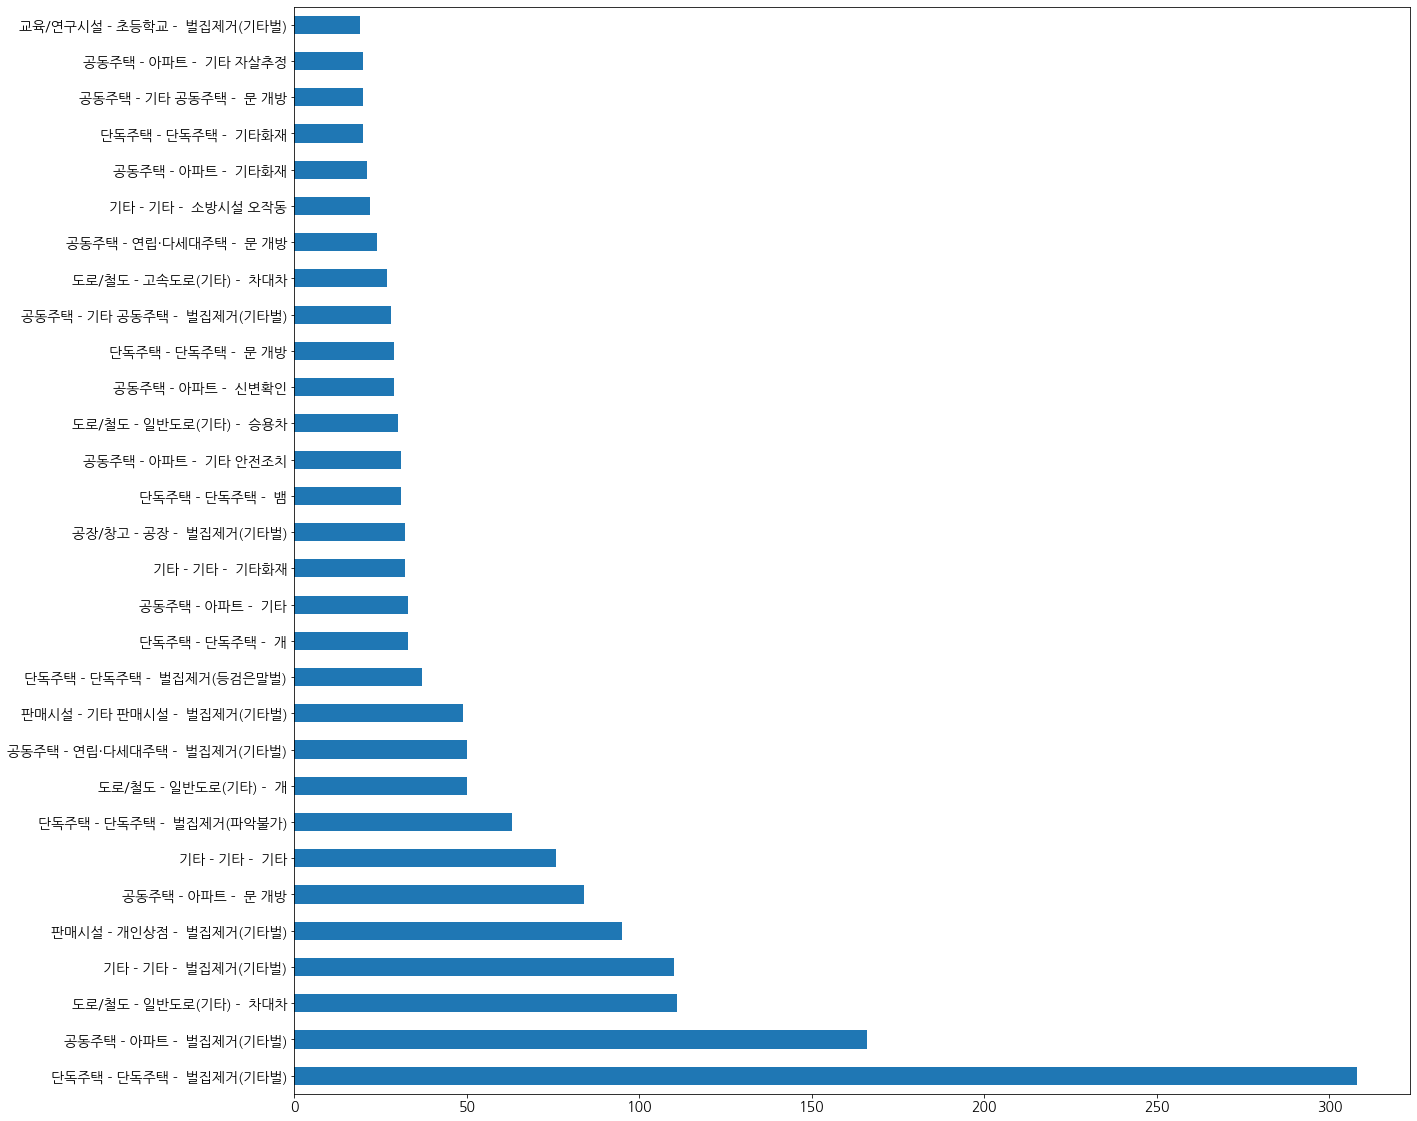

In [35]:
temp.NEW_ACDNT.value_counts().head(30).plot(kind = 'barh', figsize = (20,20), fontsize = 14)

In [ ]:
check_null(temp)

MSFRTN_RESC_REPRT_NO 열의 결측치는 0 개 입니다
ACDNT_CAUSE 열의 결측치는 0 개 입니다
PRCS_RESULT_SE_NM 열의 결측치는 0 개 입니다
DCLR_YMD 열의 결측치는 0 개 입니다
DCLR_TM 열의 결측치는 0 개 입니다
DCLR_YR 열의 결측치는 0 개 입니다
SEASON_SE_NM 열의 결측치는 3473 개 입니다
QTR_SE 열의 결측치는 3473 개 입니다
DCLR_MNTH 열의 결측치는 0 개 입니다
DCLR_DAY 열의 결측치는 0 개 입니다
DCLR_HOUR 열의 결측치는 0 개 입니다
DCLR_MIN 열의 결측치는 0 개 입니다
DSP_YMD 열의 결측치는 0 개 입니다
DSP_TM 열의 결측치는 0 개 입니다
DSP_YR 열의 결측치는 0 개 입니다
DSP_MNTH 열의 결측치는 0 개 입니다
DSP_DAY 열의 결측치는 0 개 입니다
DSP_HOUR 열의 결측치는 0 개 입니다
DSP_MIN 열의 결측치는 0 개 입니다
SPT_ARVL_YMD 열의 결측치는 0 개 입니다
SPT_ARVL_TM 열의 결측치는 0 개 입니다
SPT_ARVL_YR 열의 결측치는 0 개 입니다
SPT_ARVL_MNTH 열의 결측치는 0 개 입니다
SPT_ARVL_DAY 열의 결측치는 0 개 입니다
SPT_ARVL_HOUR 열의 결측치는 0 개 입니다
SPT_ARVL_MIN 열의 결측치는 0 개 입니다
RESC_CMPTN_YMD 열의 결측치는 0 개 입니다
RESC_CMPTN_TM 열의 결측치는 0 개 입니다
RESC_CMPTN_YR 열의 결측치는 0 개 입니다
RESC_CMPTN_MNTH 열의 결측치는 0 개 입니다
RESC_CMPTN_DAY 열의 결측치는 0 개 입니다
RESC_CMPTN_HOUR 열의 결측치는 0 개 입니다
RESC_CMPTN_MIN 열의 결측치는 0 개 입니다
HMG_YMD 열의 결측치는 0 개 입니다
HMG_TM 열의 결측치는 0 개 입니다
HMG_YR 열의 결측치는 0 개 입니다
HMG_MNTH 열

In [ ]:
temp.EMD_NM.unique()

array(['단계동', '명륜동', '무실동', '단구동', '소초면', '개운동', '지정면', '판부면', '신림면',
       '문막읍', '행구동', '반곡동', '가현동', '태장동', '부론면', '학성동', '귀래면', '흥업면',
       '관설동', '호저면', '봉산동', '일산동', '중앙동', '평원동', '우산동', '원동'],
      dtype=object)